# Vanessa Williams
# Week 11

In [2]:
from scipy import stats

#### 1a

In [4]:
from scipy.stats import binom

# Define parameters
n_models = 15       # Number of models
accuracy = 0.63     # Accuracy of each individual model
majority = n_models // 2 + 1  # Majority threshold (8 or more)

# Calculate the probability that the ensemble model is correct
ensemble_accuracy = sum(binom.pmf(k, n_models, accuracy) for k in range(majority, n_models + 1))

print(f"Ensemble Model Accuracy: {ensemble_accuracy:.4f}")

Ensemble Model Accuracy: 0.8513


#### 1b

In [13]:
# Function to calculate ensemble accuracy for a given individual model accuracy
def calculate_ensemble_accuracy(individual_accuracy):
    return sum(binom.pmf(k, n_models, individual_accuracy) for k in range(majority, n_models + 1))

# Binary search for the minimum accuracy that achieves 95% ensemble accuracy
low, high = 0.5, 1.0  # Starting range for individual model accuracy
required_accuracy = None

while low <= high:
    mid = (low + high) / 2
    ensemble_accuracy = calculate_ensemble_accuracy(mid)
    
    if ensemble_accuracy >= target_accuracy:
        required_accuracy = mid
        high = mid - 0.01  # Narrow the range downwards
    else:
        low = mid + 0.01  # Increase the lower bound

# Convert to the smallest whole number percentage
required_accuracy_percent = int(required_accuracy * 100)

print(f"Minimum individual model accuracy needed for 95% ensemble accuracy: {required_accuracy_percent}%")

Minimum individual model accuracy needed for 95% ensemble accuracy: 70%


#### 1c

In [16]:
# Define constants
individual_accuracy = 0.63  # Accuracy of each individual model
target_accuracy = 0.95      # Target ensemble accuracy of 95%

# Function to calculate ensemble accuracy for a given number of models
def calculate_ensemble_accuracy(n_models):
    majority = n_models // 2 + 1  # Majority threshold for an odd number of models
    return sum(binom.pmf(k, n_models, individual_accuracy) for k in range(majority, n_models + 1))

# Start with the smallest odd number of models and increase
n_models = 1
while True:
    ensemble_accuracy = calculate_ensemble_accuracy(n_models)
    
    if ensemble_accuracy >= target_accuracy:
        break  # Stop when we reach the target accuracy with the smallest odd number of models
    
    n_models += 2  # Increment by 2 to keep n_models an odd number

print(f"Minimum number of models needed for 95% ensemble accuracy: {n_models}")

Minimum number of models needed for 95% ensemble accuracy: 39


#### 2a

In [20]:
import pandas as pd

# Define the values that X can take
values = [1, 2, 3, 4, 5]

# Define a probability distribution that satisfies the PMF conditions
# Probabilities must be non-negative and sum to 1
probabilities = [0.1, 0.3, 0.2, 0.25, 0.15]  # These probabilities sum to 1

# Create a DataFrame to represent the PMF
pmf_df = pd.DataFrame({'X': values, 'P(X)': probabilities})

# Display the PMF
print("Probability Mass Function for X:")
print(pmf_df)

# Verify that the probabilities sum to 1
total_probability = sum(probabilities)
print(f"\nTotal Probability Sum: {total_probability}")

Probability Mass Function for X:
   X  P(X)
0  1  0.10
1  2  0.30
2  3  0.20
3  4  0.25
4  5  0.15

Total Probability Sum: 1.0


### 2b

In [27]:
import numpy as np

# Define the values that X can take and their associated probabilities
values = [1, 2, 3, 4, 5]
probabilities = [0.1, 0.3, 0.2, 0.25, 0.15]  # The probabilities from part (a)

# Function to generate 50 random X-values from the PMF and return their mean
def generate_random_x_mean():
    # Generate 50 random samples from the values using the defined probabilities
    random_samples = np.random.choice(values, size=50, p=probabilities)
    
    # Calculate and return the mean of the generated samples
    mean_value = np.mean(random_samples)
    return mean_value

# Example usage: Call the function and display the result
mean_of_random_x = generate_random_x_mean()
print(f"Mean of 50 randomly generated X-values: {mean_of_random_x}")


Mean of 50 randomly generated X-values: 3.14


### 2c

In [30]:
# Function to generate 50 random X-values from the PMF and return their mean
def generate_random_x_mean():
    random_samples = np.random.choice(values, size=50, p=probabilities)
    mean_value = np.mean(random_samples)
    return mean_value

# Function to run generate_random_x_mean 1,000 times and store the means in a list
def run_experiment():
    means = []
    for _ in range(1000):
        mean_value = generate_random_x_mean()
        means.append(mean_value)
    return means

# Run the experiment and store the results
means_list = run_experiment()
print("First 10 means of 1,000 trials:", means_list[:10])  # Display the first 10 means as a sample


First 10 means of 1,000 trials: [2.96, 2.9, 2.94, 3.12, 3.0, 3.04, 3.22, 3.04, 3.24, 2.72]


### Part 2d

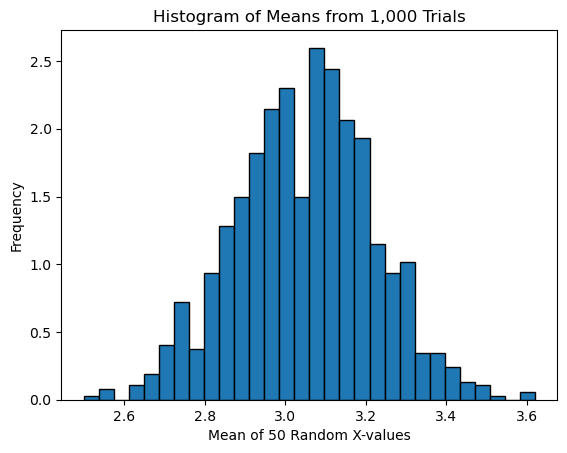

In [32]:
import matplotlib.pyplot as plt

# Define the values that X can take and their associated probabilities
values = [1, 2, 3, 4, 5]
probabilities = [0.1, 0.3, 0.2, 0.25, 0.15]  # The probabilities from part (a)

# Function to generate 50 random X-values from the PMF and return their mean
def generate_random_x_mean():
    random_samples = np.random.choice(values, size=50, p=probabilities)
    mean_value = np.mean(random_samples)
    return mean_value

# Function to run generate_random_x_mean 1,000 times and store the means in a list
def run_experiment():
    means = []
    for _ in range(1000):
        mean_value = generate_random_x_mean()
        means.append(mean_value)
    return means

# Run the experiment and get the list of means
means_list = run_experiment()

# Plot the histogram of the means
plt.hist(means_list, bins=30, edgecolor='black', density=True)
plt.title("Histogram of Means from 1,000 Trials")
plt.xlabel("Mean of 50 Random X-values")
plt.ylabel("Frequency")
plt.show()

#### Description of the Histogram Shape:
#### The histogram will likely show a bell-shaped curve, which resembles a normal distribution. This is due to the Central Limit Theorem (CLT), which states that the distribution of sample means approaches a normal distribution as the sample size becomes large, regardless of the original distribution of the data.

#### The CLT applies here because we are averaging 50 samples repeatedly (1,000 times), resulting in a normal-like distribution for the means of the  samples.

### 2e

In [39]:
# Calculate the sample mean and standard deviation of the list of means
sample_mean_of_means = np.mean(means_list)
sample_std_dev_of_means = np.std(means_list)

print(f"Sample Mean of Means: {sample_mean_of_means}")
print(f"Sample Standard Deviation of Means: {sample_std_dev_of_means}")

# Calculate theoretical mean and standard deviation
theoretical_mean = np.dot(values, probabilities)  # Mean of the PMF
theoretical_variance = np.dot((np.array(values) - theoretical_mean) ** 2, probabilities)  # Variance of the PMF
theoretical_std_dev_of_means = np.sqrt(theoretical_variance / 50)  # Standard deviation of the mean distribution

print(f"Theoretical Mean: {theoretical_mean}")
print(f"Theoretical Standard Deviation of Means: {theoretical_std_dev_of_means}")

Sample Mean of Means: 3.04814
Sample Standard Deviation of Means: 0.1705888050254178
Theoretical Mean: 3.05
Theoretical Standard Deviation of Means: 0.17592612085759182
